<a href="https://colab.research.google.com/github/Kishankumar1328/Tensorflow-Linear_Regression/blob/main/Linear_Regression_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
x=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]].values
y=df["CO2EMISSIONS"].values

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [6]:
inputs=tf.keras.layers.Input(shape=(x_train.shape[1],))

In [9]:
x=tf.keras.layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(32,activation="tanh",kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(16,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
outputs=tf.keras.layers.Dense(1)(x)

model=tf.keras.Model(inputs=inputs,outputs=outputs)

model.compile(optimizer='adam',loss='mean_squared_error')



In [10]:
history=model.fit(x_train_scaled,y_train,epochs=200,batch_size=64,verbose="auto")

Epoch 1/200
14/14 [==============================] - 1s 4ms/step - loss: 70034.7109
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 69479.2266
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 68556.2500
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 67415.4062
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 66259.9453
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 65117.5508
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 63923.2266
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 62727.7344
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 61478.3086
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 60135.1250
Epoch 11/200
14/14 [==============================] - 0s 3ms/step - loss: 58747.8633
Epoch 12/200
14/14 [==============================] - 0s 3ms/step - loss: 

Text(0.5, 1.0, 'Training Loss Curve')

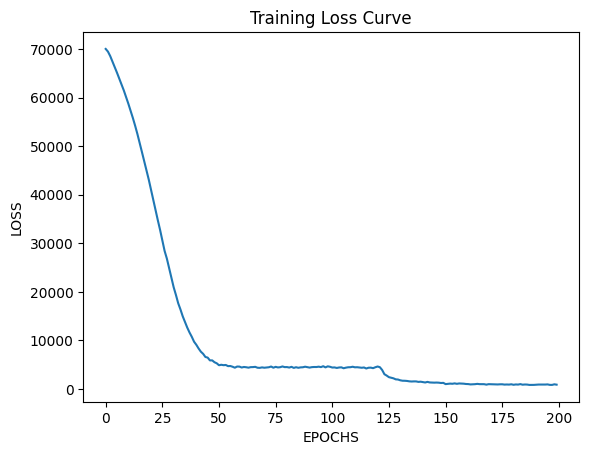

In [11]:
plt.plot(history.history['loss'])
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title("Training Loss Curve")

In [18]:
test_loss=model.evaluate(x_test,y_test)
print("Test loss:",test_loss)

7/7 [==============================] - 0s 2ms/step - loss: 18825.4551
Test loss: 18825.455078125


In [19]:
prediction=model.predict(x_test_scaled)

7/7 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Actual Vs Predicted Values')

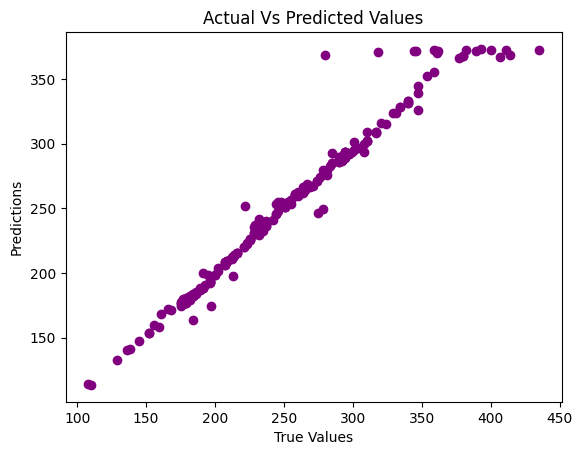

In [23]:
plt.scatter(y_test,prediction,color="purple",alpha=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual Vs Predicted Values")